In [1]:
#importing numpy and pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
features = pd.read_csv('C:/Users/Kunal/Documents/data.csv')

In [3]:
features.drop('age_60_and_above' , inplace = True , axis = 1)
features.drop('gender' , inplace = True , axis = 1)
features.drop('test_indication' , inplace = True , axis = 1)
features.drop('test_date' , inplace = True , axis = 1)

In [4]:
features['corona_result'] = features['corona_result'].replace(['positive'] , '1')
features['corona_result'] = features['corona_result'].replace(['negative'] , '0')
features['corona_result'] = features['corona_result'].replace(['others'] , '1')

In [5]:
features['cough'] = features['cough'].replace(['None'] , '0')
features['fever'] = features['fever'].replace(['None'] , '0')
features['sore_throat'] = features['sore_throat'].replace(['None'] , '0')
features['shortness_of_breath'] = features['shortness_of_breath'].replace(['None'] , '0')
features['head_ache'] = features['head_ache'].replace(['None'] , '0')

In [6]:
features.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [7]:
feature_col = ['cough' , 'fever' , 'sore_throat' , 'shortness_of_breath' , 'head_ache']
X = features[feature_col]
y = features.corona_result

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 0)

from sklearn.linear_model import LogisticRegression

In [9]:
log_reg = LogisticRegression()

In [10]:
model = log_reg.fit(X_train , y_train)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
cnf_matrix

array([[267755,   3746],
       [ 31851,  11221]], dtype=int64)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0,1]

Text(0.5, 257.44, 'predicted Values')

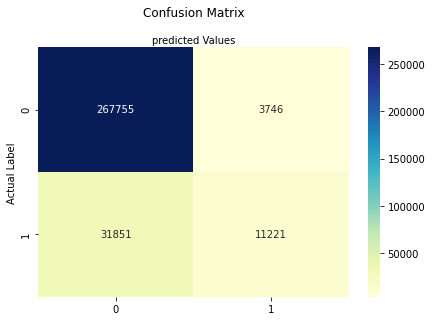

In [14]:
fig , ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks , class_names)
plt.yticks(tick_marks , class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) , annot=True, cmap="YlGnBu" , fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix" , y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('predicted Values')

In [15]:
print("Accuracy",metrics.accuracy_score(y_test , y_pred))

Accuracy 0.8868402564746498


In [16]:
inp = [int(x) for x in "1 0 0 0 0".split(' ')]
fin = [np.array(inp)]
b = log_reg.predict_proba(fin)
b[:,1]

array([0.47955161])

In [17]:
#saving Model

In [18]:
import pickle

In [21]:
pickle.dump(model , open('VMode.pkl','wb'))